### Graded Project
Machine Learning - Unsupervised Learning

### Domain:
○ E-commerce
Business Context:
● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people
Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

### Attribute Information:
SL.No Attribute and Description
1. user_id - a unique id for the customer
2. item_id - unique product id
3. weight - weight measurement of customer
4. rented - for purpose clothing was rented for
5. body type - body type of customer
6. review_text - review given by the customer
7. size - the standardized size of the product
8. rating - rating for the product
9. age - age of the customer
10. category - the category of the product
11. bust size - bust measurement of customer
12. height - height of the customer
13. review_date - date when the review was written
14. fit - fit feedback

### Data Citation:
● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.

### Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

### Import the required libraries and load the data: [ Score: 3 point ]

1. Load the required libraries and read the dataset. (1)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [22]:
df=pd.read_csv("renttherunway.csv")

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features (2)

In [23]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [24]:
df.shape

(192544, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [26]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [27]:
df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

### Data cleansing and Exploratory data analysis: [ Score: 20 point ]

3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [28]:
len(df[df.duplicated()])

0

4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’) (1)

In [29]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [30]:
df=df.drop(['Unnamed: 0','user_id','item_id','review_text','review_summary','review_date'],axis=1)

In [31]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

Q5. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [32]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [33]:
df['weight']=pd.to_numeric(df['weight'].str.replace('lbs',''))

In [34]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

Q6. Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'. (2)

In [42]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [45]:
df['rented for'] =df['rented for'].replace(['party', 'party: cocktail' ], 'party' )

In [46]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

Q7. The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype. (3)

In [47]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [50]:
df['height']=df['height'].str.replace('"','')

In [51]:
df['height']

0         5' 8
1         5' 6
2         5' 4
3         5' 5
4         5' 9
          ... 
192539    5' 9
192540    5' 1
192541    5' 8
192542    5' 6
192543    5' 6
Name: height, Length: 192544, dtype: object

In [53]:
df["height"] = (df.height.str.split("'").str[0].astype(float)*12) + (
    df.height.str.split("'").str[1].astype(float))
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

Q8. Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods. (3)

In [54]:
df.isnull().sum()/len(df) * 100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [57]:
missing_values = df.isnull().sum()/len(df)
index = [i for i in missing_values[missing_values>0].index]
numerical_columns = [i   for i in index   if i in df.columns and df[i].dtype!=object]
categorical_columns = [i   for i in index   if i in df.columns and df[i].dtype==object]

for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])    

In [58]:
df.isnull().sum()/len(df) * 100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

Q9. Check the statistical summary for the numerical and categorical columns and
write your findings. (3)

In [59]:
df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,137.019284,9.092758,65.309529,12.245175,33.861689
std,20.141448,1.429862,2.658857,8.494877,8.039050
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


Q10. Are there outliers present in the column age? If yes, treat them with the
appropriate method. (3)

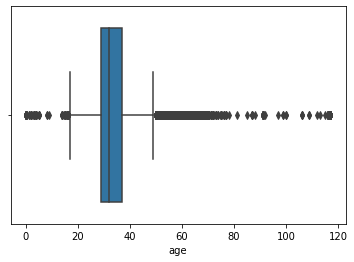

In [60]:
sns.boxplot(df['age'])
plt.show()

In [62]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

29.0
37.0
8.0


In [63]:
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)


17.0
49.0


In [65]:
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

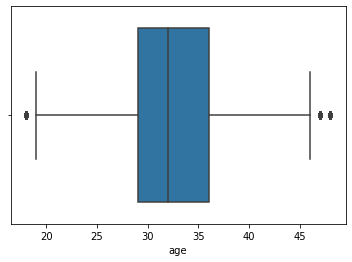

In [66]:
sns.boxplot(df_out['age'])
plt.show()

Q11. Check the distribution of the different categories in the column 'rented for'
using appropriate plot. (2)

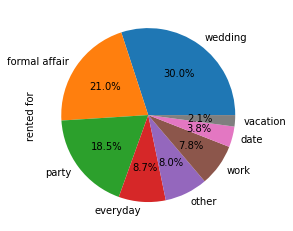

In [67]:
df['rented for'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

● Data Preparation for model building: [ Score: 2 point ]

Q12. Encode the categorical variables in the dataset. (1)

In [68]:
df1=df

In [69]:
df1.select_dtypes('object').columns

Index(['fit', 'bust size', 'rented for', 'body type', 'category'], dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes('object').columns:
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[col])

In [71]:
df1

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,41,140.0,10.0,7,3,26,69.0,8,42.0
192540,0,25,100.0,10.0,7,5,16,61.0,4,29.0
192541,0,48,135.0,6.0,1,6,16,68.0,8,31.0
192542,0,51,165.0,10.0,6,4,16,66.0,16,31.0


Q13. Standardize the data, so that the values are within a particular range. (1)

In [72]:
ds=df.select_dtypes(include=['int64','float64'])
scaler =StandardScaler()
scaler.fit(ds)
scaled_ds =pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [73]:
scaled_ds

,weight,rating,height,size,age
0,-0.000957,0.634498,1.011893,0.206575,-0.729154
1,-0.249202,0.634498,0.259688,-0.028862,0.265991
2,-0.100255,0.634498,-0.492517,-0.970608,10.217442
3,-0.100255,-0.764242,-0.116415,-0.499735,0.017205
4,0.396235,0.634498,1.387995,-0.028862,-0.853547
...,...,...,...,...,...
192539,0.147990,0.634498,1.387995,-0.499735,1.012350
192540,-1.837970,0.634498,-1.620824,-0.970608,-0.604761
192541,-0.100255,-2.162982,1.011893,-0.499735,-0.355974
192542,1.389214,0.634498,0.259688,0.442012,-0.355974


● Principal Component Analysis and Clustering: [ Score: 23 point ]

14. Apply PCA on the above dataset and determine the number of PCA
components to be used so that 90-95% of the variance in data is explained by
the same. (7)

In [92]:
##step1
cov_matrix =np.cov(scaled_ds.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519 -0.02084852  0.34905585  0.72339105  0.06298221]
 [-0.02084852  1.00000519  0.00174836 -0.03672869 -0.03513107]
 [ 0.34905585  0.00174836  1.00000519  0.22842543 -0.00728095]
 [ 0.72339105 -0.03672869  0.22842543  1.00000519  0.15512023]
 [ 0.06298221 -0.03513107 -0.00728095  0.15512023  1.00000519]]


In [93]:
##step2
eig_vals,eig_vectors = np.linalg.eig(cov_matrix)
print('eigein values:','\n',eig_vals)
print('\n')
print('eigein vectors:','\n',eig_vectors)

eigein values: 
 [1.92989844 0.26019874 0.79489824 1.04381115 0.9712194 ]


eigein vectors: 
 [[ 0.64978434 -0.71787361 -0.23771403 -0.07379837 -0.02199159]
 [-0.04425833  0.00942202 -0.03255246 -0.611652    0.78916069]
 [ 0.39729351  0.12807376  0.82112115 -0.33220862 -0.20286074]
 [ 0.62944555  0.67957257 -0.36199491  0.07637772  0.07145316]
 [ 0.14757259 -0.0796677   0.37034056  0.71009824  0.57487716]]


In [94]:
##step 3
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained:',cum_var_exp)

Variance Explained:  [38.59776829464454, 20.876114510644467, 19.424287212898353, 15.897882155747029, 5.203947826065603]
Cummulative Variance Explained: [ 38.59776829  59.47388281  78.89817002  94.79605217 100.        ]


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

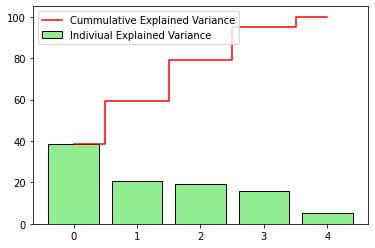

In [95]:
plt.bar(range(5),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Variance')
plt.step(range(5), cum_var_exp, where='mid',color='red',label='Cummulative Explained Variance')
plt.legend(loc = 'best')
plt.ylable('Explained Variance Ratio')
plt.xlable('Principal Components')
plt.tight_layout()
plt.show()

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)
a. Find the optimal K Value using elbow plot for K Means clustering. 
b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [98]:
pca =PCA(n_components = 5)
pca.fit(scaled_ds)

PCA(n_components=5)

In [99]:
data_pca = pca.transform(scaled_ds)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,0.395739,-1.226174,-0.108945,0.465645,0.334735
1,-0.065751,-0.269296,0.604371,0.360775,0.177329
2,0.607969,6.964180,6.407259,3.734050,-1.458728
3,-0.389588,0.487571,-0.603106,0.140393,-0.291116
4,0.636700,-1.486744,-0.282310,0.719212,-0.052316


In [102]:
##finding optimal k value by KMeans clusters using Elbow plot
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters  = KMeans(num_clusters,n_init=8)
    clusters.fit(data_pca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range,
                           'cluster_errors':cluster_errors})   
clusters_df
    

,num_clusters,cluster_errors
0,1,962720.000000
1,2,738070.088691
2,3,635094.646008
3,4,554765.309373
4,5,482053.370951
5,6,442080.510944
6,7,411768.713227
7,8,385812.264660
8,9,366024.725276
9,10,348895.314590


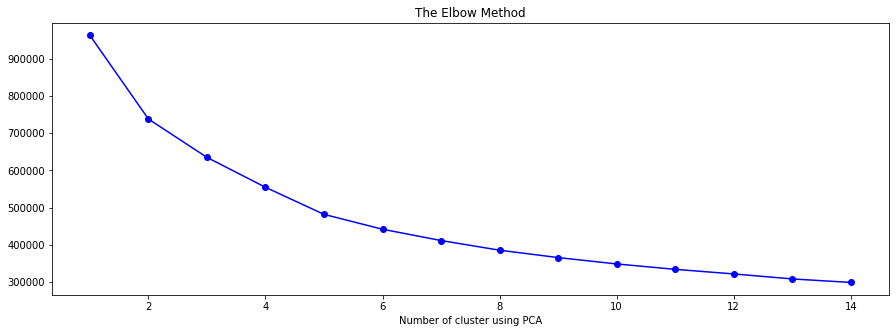

In [105]:
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of cluster using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [111]:
## Fit the KMeans clustering models using the obtained optimal k
kmeans = KMeans(n_clusters=3, n_init=15, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=100)

In [112]:
##obtained labels from kmeans clustering
kmeans.labels_

array([0, 0, 1, ..., 2, 1, 1])

In [117]:
##Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['labels']))
kmeans_df=data_pca.join(df_labels)
kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,labels
0,0.395739,-1.226174,-0.108945,0.465645,0.334735,0
1,-0.065751,-0.269296,0.604371,0.360775,0.177329,0
2,0.607969,6.964180,6.407259,3.734050,-1.458728,1
3,-0.389588,0.487571,-0.603106,0.140393,-0.291116,2
4,0.636700,-1.486744,-0.282310,0.719212,-0.052316,1


In [ ]:
kmeans_df['Labels'].value_counts()

In [ ]:
from sklearn.metrics import silhouette_score
kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    Kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

16. Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data) (8)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

In [ ]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylable('Euclidean distance')
plt.show()

● Conclusion : [ Score: 2 point ]
    
17. Perform cluster analysis by doing bivariate analysis between cluster labels
and different features and write your conclusion on the results. (2)

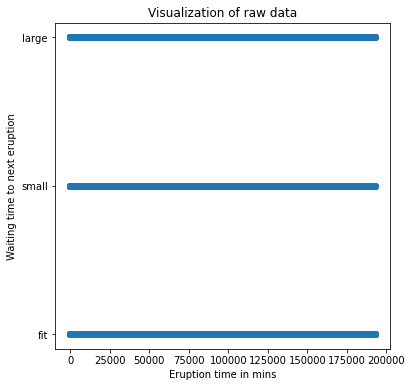

In [53]:
df = pd.read_csv('C:/Users/ANUbrr/Documents/DrSVRajashekararadhya_project_2_Python for DS/renttherunway.csv')
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

Thank you